##Call Center Food Delivery Analysis
By : Eng.Maha Koutb
https://www.linkedin.com/in/maha-koutb/

##Analysis Objective :
Uncover insights that could help improve efficiency, profitability, and customer satisfaction


##Potential metrics & KPIS that will be calculated in this Project :
1. Average Delivery Time: The time it takes from when an order is placed to when it is
delivered. This KPI is crucial for measuring the efficiency of the delivery service.
2. Driver Efficiency: This can be determined by calculating the number of deliveries completed per hour by each driver.
3. Order Completion Rate: The percentage of orders that are successfully delivered versus those that are refunded. This can be a measure of customer satisfaction and operational efficiency.
4. Average Tip per Delivery: This can serve as a proxy for customer satisfaction and could be used to reward high-performing drivers.
5. Peak Ordering Times: Understanding when most orders are placed can help with resource allocation and planning.


##Lets Start with Exploration Data Analysis - EDA

In [1]:

#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime , time

In [2]:

#read data

data = pd.read_csv("/content/Call Center_Restaurant Orders - Copy.csv")
data.head(5)


,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
0,1/1/2020,2:52:12,3:00:25,3:08:09,3:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2,1.40,0.0
1,1/1/2020,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2,11.03,0.0
2,1/1/2020,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8,4.31,0.0
3,1/1/2020,4:01:57,4:08:18,4:13:02,4:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2,8.55,0.0
4,1/1/2020,23:46:38,23:49:32,23:54:29,0:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2,8.82,0.0


In [3]:
#display data types, missing values and features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72314 entries, 0 to 72313
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               72314 non-null  object 
 1   Time customer placed order         72314 non-null  object 
 2   Time order placed at restaurant    72154 non-null  object 
 3   Time driver arrived at restaurant  54190 non-null  object 
 4   Delivery time                      72314 non-null  object 
 5   Driver ID                          72314 non-null  int64  
 6   Driver Name                        72314 non-null  object 
 7   Restaurant ID                      72314 non-null  int64  
 8   Customer ID                        72314 non-null  int64  
 9   Delivery Area                      72314 non-null  object 
 10  ASAP                               72314 non-null  object 
 11  Sub Total                          72314 non-null  flo

In [4]:
#check types of objects for dates

print(type(data["Date"][0]))
print(type(data["Time customer placed order"][0]))
print(type(data["Time order placed at restaurant"][0]))
print(type(data["Time driver arrived at restaurant"][0]))
print(type(data["Delivery time"][0]))



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
#count of nissing values @Time driver at restuarant

data["Time driver arrived at restaurant"].isnull().sum()

18124

In [6]:
#Size of data

data.shape

(72314, 17)

In [7]:
#check duplicates

data.duplicated().sum()

0

###Data types of the following columns need to be changed:
** Time customer placed order.
** Time order placed at restaurant.
** Time driver arrived at restaurant
** Delivery time
** Date
** Driver ID
** Restaurant ID
** Customer ID



In [8]:
#Convert datetime from string object  to datetime object

data["Time customer placed order"] = pd.to_datetime(data["Time customer placed order"],format='%H:%M:%S').dt.time
data["Time order placed at restaurant"] = pd.to_datetime(data["Time order placed at restaurant"] , format='%H:%M:%S').dt.time
data["Time driver arrived at restaurant"] = pd.to_datetime(data["Time driver arrived at restaurant"], format='%H:%M:%S').dt.time
data["Delivery time"] = pd.to_datetime(data["Delivery time"], format='%H:%M:%S').dt.time

In [9]:
#convert the rest of columns to date & string

data["Date"] = pd.to_datetime(data["Date"])
data["Driver ID"] = data["Driver ID"].values.astype(str)
data["Restaurant ID"] = data["Restaurant ID"].values.astype(str)
data["Customer ID"] = data["Customer ID"].values.astype(str)

<ipython-input-9-98af4b44ad44>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [10]:
#check date types after conversion

print(type(data["Date"][0]))
print(type(data["Time customer placed order"][0]))
print(type(data["Time order placed at restaurant"][0]))
print(type(data["Time driver arrived at restaurant"][0]))
print(type(data["Delivery time"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>


In [11]:
#recheck after conversion

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72314 entries, 0 to 72313
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               72314 non-null  datetime64[ns]
 1   Time customer placed order         72314 non-null  object        
 2   Time order placed at restaurant    72154 non-null  object        
 3   Time driver arrived at restaurant  54190 non-null  object        
 4   Delivery time                      72314 non-null  object        
 5   Driver ID                          72314 non-null  object        
 6   Driver Name                        72314 non-null  object        
 7   Restaurant ID                      72314 non-null  object        
 8   Customer ID                        72314 non-null  object        
 9   Delivery Area                      72314 non-null  object        
 10  ASAP                              

In [12]:
#duration of data , start date & end date

print(data["Date"].max())
print(data["Date"].min())

2020-12-04 00:00:00
2020-01-01 00:00:00


In [13]:
#5 number summary for numeric data

data.describe()

,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
count,72314.000000,72314.000000,72314.000000,72314.000000,72314.000000,72314.000000
mean,93.844955,5.610922,3.474285,3.648726,9.494586,0.879774
std,95.809156,3.443500,1.388401,6.791021,10.862448,9.708033
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.420000,2.710000,2.330000,2.000000,3.510000,0.000000
50%,69.850000,5.400000,3.340000,2.000000,6.610000,0.000000
75%,106.990000,8.130000,4.520000,3.000000,11.740000,0.000000
max,3593.410000,13.660000,6.840000,261.000000,469.050000,940.400000


In [14]:
#create new 3 columns after conversion of  time columns to total minutes in order to calculate frequency & diff

data["Time customer placed order-MIN"] = data["Time customer placed order"].apply(lambda t: t.hour*60 +t.minute)
data["Time order placed at restaurant-MIN"] = data["Time order placed at restaurant"].apply(lambda t: t.hour*60 +t.minute)
data["Delivery time-MIN"] = data["Delivery time"].apply(lambda t: t.hour*60 +t.minute)

In [15]:
#data after adding new columns

data.head(2)

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Time customer placed order-MIN,Time order placed at restaurant-MIN,Delivery time-MIN
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2,1.40,0.0,172,180.0,215
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2,11.03,0.0,958,1076.0,1137


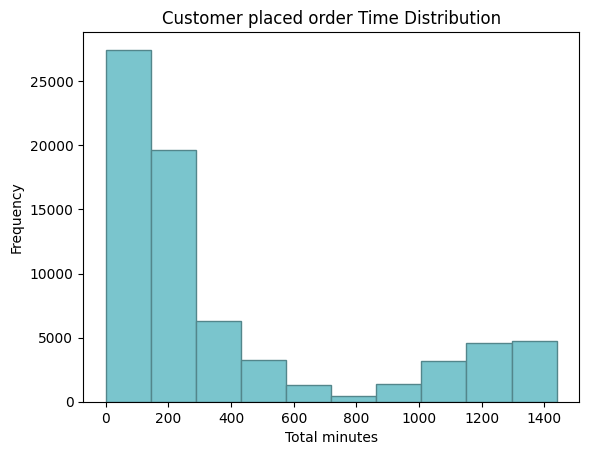

In [16]:
#plot histogram of "Time customer placed order-MIN" to determine the peak ordering time

"""

X- Axis represent total minutes of order time thats mean :

200 ------ 3:20 AM
400 ------ 6:40 AM
600 ------ 10:00 AM
800 ------ 13:20 AM
1400 ------ 24:00 AM


"""


plt.hist(data["Time customer placed order-MIN"], color = "#7AC5CD", ec="#53868B")
plt.xlabel("Total minutes")
plt.ylabel("Frequency")
plt.title("Customer placed order Time Distribution")
plt.show()

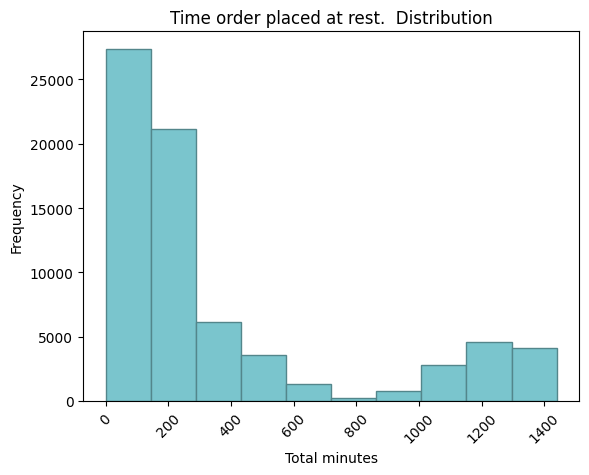

In [17]:
#plot histogram of "Time order placed at restaurant-MIN" to determine the peak ordering time

plt.hist(data["Time order placed at restaurant-MIN"], color = "#7AC5CD", ec="#53868B" )
plt.xticks(rotation = 45)
plt.xlabel("Total minutes")
plt.ylabel("Frequency")
plt.title("Time order placed at rest.  Distribution")
plt.show()


<a id='FIV'></a>
##Answer of Question 5

###The peak ordering time is approximately between 12 AM to 3 AM

In [18]:
#count of drivers

data["Driver Name"].nunique()

432

In [19]:
#value counts of DRIVERS to discover if there are Drivers delivered more than their colleagues

data["Driver Name"].value_counts()

Doris       244
Bailey      244
Erin        240
Chelsea     240
Patricia    240
           ... 
Monique     108
Kellie      108
Michael     104
Kathy       104
Andrea       84
Name: Driver Name, Length: 432, dtype: int64

In [20]:
#count of resturants

data["Restaurant ID"].nunique()


408

In [21]:
#value counts of resturants to discover if there are top restaurants

data["Restaurant ID"].value_counts()



7320    256
7123    252
7213    244
7113    244
7247    240
       ... 
7092    112
7193    108
7259    104
7322    100
7228     96
Name: Restaurant ID, Length: 408, dtype: int64

###Insignificant // data shows similar records for all resturants & drivers

there is no Top restaurants or drivers  but  we can classify them into 3 classes  A B C as follwing [ <120 , <180 , <250 ]

In [22]:
#Count of customers

data["Customer ID"].nunique()

6262

In [23]:
#groub by customers by sub total  to discover if there are top customers who orderd the most

customers = data.groupby(["Customer ID"])["Sub Total"].sum(0)
customers


Customer ID
1000052    1397.36
1000067     840.78
1000107     296.79
1000127    1476.88
1000220    2010.55
            ...   
1200279     283.74
1200280     659.50
1200282    1844.90
1200353     289.20
1200360    1227.29
Name: Sub Total, Length: 6262, dtype: float64

In [24]:
#creat customer dataframe

customers = pd.DataFrame(customers)
customers


,Sub Total
Customer ID,
1000052,1397.36
1000067,840.78
1000107,296.79
1000127,1476.88
1000220,2010.55
...,...
1200279,283.74
1200280,659.50
1200282,1844.90


In [25]:
#discover 5 number summary to determine top values of sub total

customers.describe()

,Sub Total
count,6262.000000
mean,1083.727890
std,662.091969
min,137.320000
25%,587.622500
50%,963.100000
75%,1438.225000
max,5709.640000


###found that max value of sub total is 5709 , so top customers will be greater than 5000 , we can find greater range than who exceed 5000 , lets see above 3000


In [26]:

top_customersA = customers[customers["Sub Total"] > 5000]
top_customersB = customers[(customers["Sub Total"] > 4000 ) & (customers["Sub Total"] < 5000) ]
top_customersC = customers[(customers["Sub Total"] > 3000 ) & (customers["Sub Total"] < 4000) ]

print(top_customersA);
print(top_customersB);
print(top_customersC);

             Sub Total
Customer ID           
1059088        5493.73
1077359        5709.64
1078645        5110.21
1148787        5169.75
             Sub Total
Customer ID           
1005835        4468.84
1028300        4349.62
1028752        4119.48
1080979        4890.97
1097734        4144.81
1112405        4503.94
1171486        4140.14
1172573        4733.70
             Sub Total
Customer ID           
1000392        3037.46
1005635        3161.02
1005771        3298.79
1006722        3185.47
1007000        3492.17
...                ...
1187602        3008.67
1190942        3099.02
1193926        3113.05
1194120        3173.55
1196811        3111.65

[72 rows x 1 columns]


###Top_clients

#1059088    --    5493.73
#1077359    --    5709.64
#1078645    --    5110.21
#1148787    --    5169.75

### Class A = 4 Clients > 5000
### Class B = 8 Clients > 4000 & < 5000
### Class C = 72 Clients > 3000 & < 4000

In [27]:
top_customersB = customers[(customers["Sub Total"] > 4000 ) & (customers["Sub Total"] < 5000) ]

In [28]:

#count of delivery areas

data["Delivery Area"].nunique()

3

In [29]:
#count of orders per each areas to discover top area
data["Delivery Area"].value_counts()

Fremont       24229
Hayward       24085
Union City    24000
Name: Delivery Area, dtype: int64

In [30]:
'''
   Creat a function that takes dataframe and column and return histogram
    df = dataframe
    column : column
'''


def hist(df , column):
  plt.hist(df[column], color = "#7AC5CD", ec="#53868B" )
  plt.xticks(rotation = 45)
  plt.ylabel("Frequency")

  return plt.show()




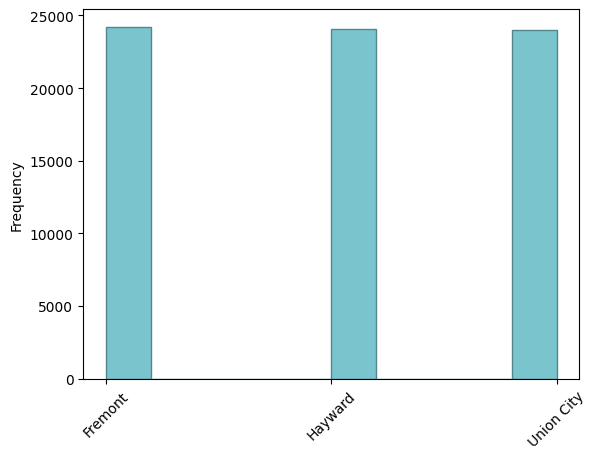

In [31]:
hist(data,"Delivery Area")


###Insignificant // data shows similar records for all areas

In [32]:
Revenue = data["Sub Total"].sum()
print(f" sub_total is {Revenue}")

 sub_total is 6786304.05


In [33]:

#sub_total
#five number summary

print(data["Sub Total"].describe())
Revenue = round(data["Sub Total"].sum())

#----------------------------------------------------------------
#delivery fees
#five number summary

print(data["Delivery fee"].describe())
Total_Delivery_fee =round(data["Delivery fee"].sum())

#----------------------------------------------------------------
#service fees
#five number summary
#total
print(data["Service fee"].describe())
Total_Service_fee = round(data["Service fee"].sum())

#-------------------------------------------------------------------


print(f"Revenue : {Revenue}")
print(f"Total_Service_fee : {Total_Service_fee}")
print(f"Total_Delivery_fee : {Total_Delivery_fee}")


# %of delivery fees

delivery_fees_percent = round((data["Delivery fee"].sum()/data["Sub Total"].sum())*100 , 1)
print(f"delivery_fees_percent% : {delivery_fees_percent} %.")


# % of service fees
service_fees_percent = round((data["Service fee"].sum()/data["Sub Total"].sum())*100 , 1)
print(f"service_fees_percent% : {service_fees_percent} %.")

count    72314.000000
mean        93.844955
std         95.809156
min          0.000000
25%         47.420000
50%         69.850000
75%        106.990000
max       3593.410000
Name: Sub Total, dtype: float64
count    72314.000000
mean         5.610922
std          3.443500
min          0.000000
25%          2.710000
50%          5.400000
75%          8.130000
max         13.660000
Name: Delivery fee, dtype: float64
count    72314.000000
mean         3.474285
std          1.388401
min          1.000000
25%          2.330000
50%          3.340000
75%          4.520000
max          6.840000
Name: Service fee, dtype: float64
Revenue : 6786304
Total_Service_fee : 251239
Total_Delivery_fee : 405748
delivery_fees_percent% : 6.0 %.
service_fees_percent% : 3.7 %.


#Revenue & service fee & delivery fee and their percentage

######Revenue : 6.7 Million dollars
######Total_Service_fee : 251239
######Total_Delivery_fee : 405748
######Delivery_fees_percent% : 6.0 %.
######Service_fees_percent% : 3.7 %.

In [34]:
#discount

Discount = data["Discount"].sum()
Discount_percent = round(Discount/Revenue*100 , 1)

print(f" Discount  : {Discount_percent} %")

 Discount  : 3.9 %


In [35]:
#tips

data["Tip"].describe()

count    72314.000000
mean         9.494586
std         10.862448
min          0.000000
25%          3.510000
50%          6.610000
75%         11.740000
max        469.050000
Name: Tip, dtype: float64

In [36]:
#count of orders that delivered witout tips

Orders_delivered_without_tips = data[data["Tip"]== 0]

print(Orders_delivered_without_tips["Tip"].count())

x = round(Orders_delivered_without_tips["Tip"].count()/72314 , 3)*100


print(f"perecent of orders delivered without tips : {x}  %")

2745
perecent of orders delivered without tips : 3.8  %


In [37]:
#count of Drivers who were not received tips

Driver_with_0_tips =  data.groupby(["Driver ID"])["Tip"].sum(0)
Driver_with_0_tips= pd.DataFrame(Driver_with_0_tips)

Driver_with_0_tips.min()


Tip    859.59
dtype: float64

###There was no drivers  receive 0 tips as total and minimum total 860 usd

In [38]:
#tips
#display 5 number summary of tips
#calculate total tips
#calculate average of tips per order
#calculate average of tips per driver


print(data["Tip"].describe())
Total_tips = data["Tip"].sum()
Total_tips


count    72314.000000
mean         9.494586
std         10.862448
min          0.000000
25%          3.510000
50%          6.610000
75%         11.740000
max        469.050000
Name: Tip, dtype: float64


686591.49

In [39]:
Average_Tips_Per_driver = round(Total_tips/432)

Average_Tips_Per_driver

1589

<a id='FOU'></a>

#####As shown above: the range of tips is wide, so I will use median i/o mean due to avoid the effect of outliers & non-logical data

#Answer of Question 4

* Average of Tips per order = 6.61
* Average of total Tips per driver = 1589

In [40]:
#grouping data by weekday to know which day has more orders

date_data = data.groupby('Date')[["Customer ID"]].count()
date_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2020-01-01 to 2020-12-04
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer ID  112 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [41]:
#add new column "day" represent weekday name
date_data["day"] = date_data.index.day_name()
date_data.head(3)

,Customer ID,day
Date,,
2020-01-01,1209,Wednesday
2020-01-02,615,Thursday
2020-01-03,615,Friday


In [42]:
#show how many orders placed  per week day

date_data.groupby("day").sum()

,Customer ID
day,
Friday,9151
Monday,10101
Saturday,10870
Sunday,10102
Thursday,10243
Tuesday,10343
Wednesday,11504


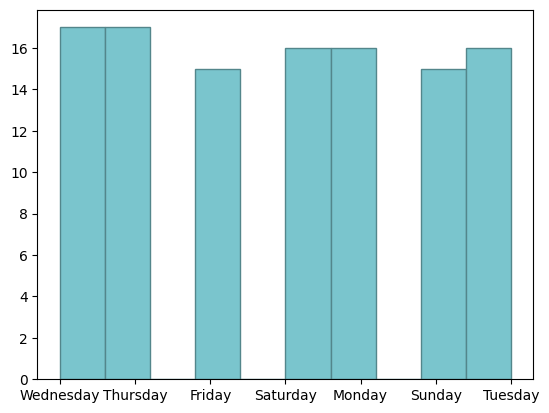

In [43]:
#plot histogram
plt.hist(date_data["day"], color = "#7AC5CD", ec="#53868B")
plt.show()

#Insignficant result ,, all days are mostly equals each other while Wednesday is slightly greater

In [44]:
#create new column for refunded and completed orders and name it "Refunded_Completed"
#first making copy of "Refunded amount" column then replace 0.0 values with "completed" and the rest with "Refunded"

data["Refunded_Completed"] = data["Refunded amount"]
data["Refunded_Completed"] = data["Refunded_Completed"].replace([0.0], 'Completed')
data.loc[(data.Refunded_Completed != "Completed") , "Refunded_Completed" ] = "Refunded"


In [45]:
data["Refunded_Completed"].value_counts()

Completed    70330
Refunded      1984
Name: Refunded_Completed, dtype: int64

In [46]:
#completion rate

Completion_rate = round(70330/(70330+1984)*100, 1)

print ( f"Completion_rate : {Completion_rate} % ")

Completion_rate : 97.3 % 


<Axes: >

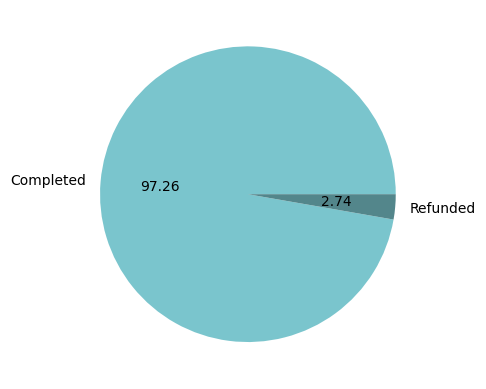

In [47]:
#plot completed vs refunded

data.groupby('Refunded_Completed').size().plot(kind='pie', autopct='%.2f', colors = ["#7AC5CD" , "#53868B"])


<a id='THR'></a>

#Answer of Question 3

##order_Completion_rate : 97.3 %

In [48]:
#display the first row after adding "completed_refunded" column

data.head(1)

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,...,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount,Time customer placed order-MIN,Time order placed at restaurant-MIN,Delivery time-MIN,Refunded_Completed
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,...,21.39,0.43,3.83,2,1.4,0.0,172,180.0,215,Completed


In [49]:
#create a function which takes 3 argument as below and return new column called "diff"

def compare_column_values(df, column1, column2):
  """
  Compares the values in two columns and returns the difference.

  Args:
    df: The DataFrame to be used.
    column1: The name of the first column.
    column2: The name of the second column.

  Returns:
    A new DataFrame with the difference between the values in the two columns.
  """

  # Create a new DataFrame with the difference between the values in the two columns.
  df_diff = df[column1] - df[column2]

  # If the value in column2 is greater than or equal to the value in column1, then the difference is positive.
  # Otherwise, the difference is negative, so we need to add 1440 minutes to it.

  df_diff[df_diff < 0] = df_diff[df_diff < 0] + 1440

  #assign the result to new column "diff"

  data["diff"]=df_diff

  return data["diff"]




In [50]:
#apply the function by pathing  [data, "Delivery time-MIN", "Time customer placed order-MIN"]

compare_column_values(data, "Delivery time-MIN", "Time customer placed order-MIN")


0         43
1        179
2         29
3         36
4         51
        ... 
72309     52
72310     81
72311    103
72312    137
72313    162
Name: diff, Length: 72314, dtype: int64

In [51]:
#reassign "diff" column to "Total_delivery_time"

data["Total_delivery_time"] = data["diff"]

In [52]:
# five number summary to determine average minutes taken in delivery starting from customer placed order time till delivery

data["Total_delivery_time"].describe()

count    72314.000000
mean       137.774995
std        260.185031
min          0.000000
25%         46.000000
50%         62.000000
75%         91.000000
max       1439.000000
Name: Total_delivery_time, dtype: float64


<a id='ONE'></a>

#Answer of Question 1
##
According to the above stats, it seems that there are some outliers in data, 1439 min in delivery is not a logical record,
that because data shows that there are some orders delivered in the same min as placed order  , because of this illogical records, so we will represent average by median not mean



* 62 MIN is median of delivery time

In [53]:
data.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,...,Service fee,Discount,Tip,Refunded amount,Time customer placed order-MIN,Time order placed at restaurant-MIN,Delivery time-MIN,Refunded_Completed,diff,Total_delivery_time
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,...,3.83,2,1.40,0.0,172,180.0,215,Completed,43,43
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,...,2.30,2,11.03,0.0,958,1076.0,1137,Completed,179,179
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,...,2.39,8,4.31,0.0,1142,1152.0,1171,Completed,29,29
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,...,2.55,2,8.55,0.0,241,248.0,277,Completed,36,36
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,...,3.35,2,8.82,0.0,1426,1429.0,37,Completed,51,51


In [54]:
#apply the function by pathing  [data, "Delivery time-MIN", "Time order placed at restaurant-MIN"]

compare_column_values(data, "Delivery time-MIN", "Time order placed at restaurant-MIN")

0         35.0
1         61.0
2         19.0
3         29.0
4         48.0
         ...  
72309     49.0
72310     52.0
72311     58.0
72312    122.0
72313    148.0
Name: diff, Length: 72314, dtype: float64

In [55]:
#reassign "diff" column to "driver_efficiency_time"

data["driver_efficiency_time"]=data["diff"]

In [56]:
#display data after generated Total_delivery_time & driver_efficiency_time

data.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,...,Discount,Tip,Refunded amount,Time customer placed order-MIN,Time order placed at restaurant-MIN,Delivery time-MIN,Refunded_Completed,diff,Total_delivery_time,driver_efficiency_time
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,...,2,1.40,0.0,172,180.0,215,Completed,35.0,43,35.0
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,...,2,11.03,0.0,958,1076.0,1137,Completed,61.0,179,61.0
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,...,8,4.31,0.0,1142,1152.0,1171,Completed,19.0,29,19.0
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,...,2,8.55,0.0,241,248.0,277,Completed,29.0,36,29.0
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,...,2,8.82,0.0,1426,1429.0,37,Completed,48.0,51,48.0


In [57]:
# five number summary to determin average minutes taken in delivery from Time order placed at restaurant till delivered to customer

data["driver_efficiency_time"].describe()


count    72154.000000
mean        91.045167
std        192.501978
min          0.000000
25%         38.000000
50%         50.000000
75%         68.000000
max       1439.000000
Name: driver_efficiency_time, dtype: float64

In [58]:
#group data by "Driver ID" & "Driver Name" to determine total tips & total time

data2= data.groupby(["Driver ID" , "Driver Name"])[["Tip" , "driver_efficiency_time"]].sum()

print(data2.head())


                           Tip  driver_efficiency_time
Driver ID Driver Name                                 
9007      Judith       1651.16                 16445.0
9008      Jessie       1893.93                 21111.0
9009      Fred         1724.12                 13598.0
9010      Marie        1444.66                 10306.0
9011      Mallory      2106.47                 22648.0


In [59]:
#adding orders count per each driver

data3 = data.groupby(["Driver ID" , "Driver Name"])["Customer ID"].count()
data3 = pd.DataFrame(data3)
data3= data3.rename(columns={"Customer ID" : "Orders_count"})
#df = df.rename(columns={"City": "Location"})
data3

,,Orders_count
Driver ID,Driver Name,
9007,Judith,160
9008,Jessie,192
9009,Fred,172
9010,Marie,156
9011,Mallory,216
...,...,...
9434,Alícia,164
9435,Paige,156
9436,Alison,160


In [60]:
#merge data2 with data3

data_merged = data2.merge(data3, on=["Driver ID","Driver Name"])
data_merged = pd.DataFrame(data_merged)

data_merged = data_merged.reset_index(drop=False)
data_merged

,Driver ID,Driver Name,Tip,driver_efficiency_time,Orders_count
0,9007,Judith,1651.16,16445.0,160
1,9008,Jessie,1893.93,21111.0,192
2,9009,Fred,1724.12,13598.0,172
3,9010,Marie,1444.66,10306.0,156
4,9011,Mallory,2106.47,22648.0,216
...,...,...,...,...,...
427,9434,Alícia,1570.27,15719.0,164
428,9435,Paige,1715.56,18172.0,156
429,9436,Alison,1551.00,15084.0,160
430,9437,Bonnie,2310.25,20166.0,236


In [61]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Driver ID               432 non-null    object 
 1   Driver Name             432 non-null    object 
 2   Tip                     432 non-null    float64
 3   driver_efficiency_time  432 non-null    float64
 4   Orders_count            432 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 17.0+ KB


In [62]:

# calculate Driver Efficiency by calculating the number of deliveries completed per hour by each driver.

data_merged["effeciency"] = data_merged["Orders_count"]/(data_merged["driver_efficiency_time"]/60)
print(data_merged.describe())
data_merged

               Tip  driver_efficiency_time  Orders_count  effeciency
count   432.000000              432.000000    432.000000  432.000000
mean   1589.332153            15206.650463    167.393519    0.677904
std     277.169515             3506.931071     26.319962    0.106470
min     859.590000             6438.000000     84.000000    0.426676
25%    1401.187500            12816.750000    148.000000    0.607314
50%    1582.130000            14922.500000    166.000000    0.668235
75%    1767.432500            17177.250000    184.000000    0.735185
max    2365.070000            27980.000000    244.000000    1.066535


,Driver ID,Driver Name,Tip,driver_efficiency_time,Orders_count,effeciency
0,9007,Judith,1651.16,16445.0,160,0.583764
1,9008,Jessie,1893.93,21111.0,192,0.545687
2,9009,Fred,1724.12,13598.0,172,0.758935
3,9010,Marie,1444.66,10306.0,156,0.908209
4,9011,Mallory,2106.47,22648.0,216,0.572236
...,...,...,...,...,...,...
427,9434,Alícia,1570.27,15719.0,164,0.625994
428,9435,Paige,1715.56,18172.0,156,0.515078
429,9436,Alison,1551.00,15084.0,160,0.636436
430,9437,Bonnie,2310.25,20166.0,236,0.702172


In [63]:
#filter with effeciency > .95
#sort by desc

Top_drivers_effeciency = data_merged[data_merged["effeciency"] > .95]
Top_drivers_effeciency = Top_drivers_effeciency.sort_values(by='effeciency', ascending=False)
Top_drivers_effeciency

,Driver ID,Driver Name,Tip,driver_efficiency_time,Orders_count,effeciency
394,9401,Robin,1617.86,8101.0,144,1.066535
130,9137,Larry,1175.68,7941.0,136,1.027578
124,9131,Irene,1655.00,9095.0,152,1.002749
374,9381,Daisy,1432.25,10028.0,164,0.981252
323,9330,Dorothy,1721.71,11321.0,184,0.975179
99,9106,Michael,859.59,6438.0,104,0.969245
10,9017,Briana,1328.20,9614.0,153,0.954857
123,9130,Emma,2100.59,13591.0,216,0.953572


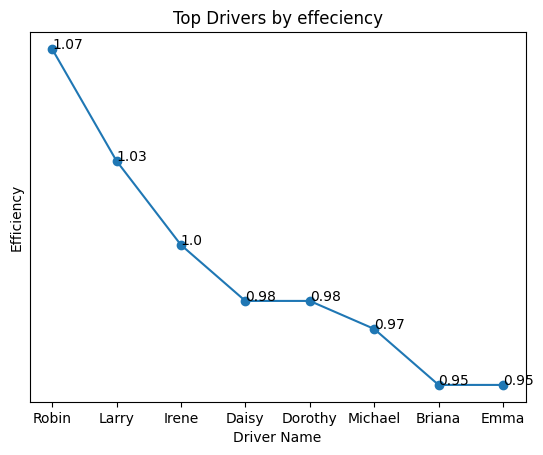

In [64]:
x = Top_drivers_effeciency["Driver Name"].astype('category')
y = round(Top_drivers_effeciency["effeciency"], 2)

# Plot the line
plt.plot(x, y , marker='o')

# Add a title and labels to the axes
plt.title('Top Drivers by effeciency')
plt.xlabel('Driver Name')
plt.ylabel('Efficiency')

#show data labels on line
for x, y in zip(x, y):
    plt.annotate(str(y), (x, y))

#remove y axis values

plt.yticks([])

# Show the plot
plt.show()

<a id='TO'></a>

#Answer of Question 2

#Top 3 drivers by effeciency & Tips

* 9131	Irene	-- 1655.00		--	1.002749
* 9137	Larry	-- 1175.68		-- 1.027578
* 9401	Robin	-- 1617.86		-- 1.066535


#Conclusion

* only 1% of total amount & only 3 % of orders  are refunded  which is a good sign of customer satisfaction of this service

* Total completion rate 97 %

* The Beak of ordering time between 12 AM to 3:00 AM all weekdays

* only 2715 didn't pay tip about 3.7 % of total orders , which is a good sign of customer satisfaction also





* Drivers efficiency  between 0.42 to 1.07

* Median of Tip 6.6 & average of Tip 9.5

* Top drivers are Robin & Larry & Irene

* We have 82 top clients and over 6262 clients who order more than 3000 $ in 4 months from Jan to April

### we have to work on maintain them and acquiring new ones with the same characteristics

